#Species distribution regression models with multiple features

##Import packages and load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mammals = pd.read_csv('/content/MamPopd_Ecog_Data_R2.csv')

## A first look at the data and data cleaning

In [86]:
mammals.head()

,Species,Order,Family,Year,Longitude,Latitude,Site,Country,Density (Ind/km2),Method,...,NDVI_10km,Species Richness_10km,Accessibility_10kmBuff,Human Footprint_10kmBuff,Night Lights_10kmBuff,Cropland_10kmBuff,Pasture_10kmBuff,Human Population Density_10kmBuff,NDVI_10kmBuff,Species Richness_10kmBuff
0,Aepyceros melampus,Cetartiodactyla,Bovidae,1990,31.540,-2.460,Biharamulo-Burigi GRs & surrounds,Tanzania,1.501,Census,...,0.617,132.687,424.500,8.534,0.000,5.501,11.049,17.616,0.605,133.182
1,Aepyceros melampus,Cetartiodactyla,Bovidae,1990,35.810,-3.510,Lake Manyara NP,Tanzania,6.818,Census,...,0.336,153.485,194.286,7.787,0.059,9.311,21.845,46.886,0.372,153.443
2,Aepyceros melampus,Cetartiodactyla,Bovidae,1990,35.093,-1.512,NaN,Kenya,5.924,NaN,...,0.511,157.384,495.000,5.003,0.003,0.225,2.198,9.096,0.508,157.750
3,Alcelaphus buselaphus,Cetartiodactyla,Bovidae,1990,35.574,-3.170,NaN,Tanzania,0.453,NaN,...,0.621,155.449,NaN,NaN,0.020,0.000,0.000,2.326,NaN,NaN
4,Alcelaphus buselaphus,Cetartiodactyla,Bovidae,1990,35.093,-1.512,NaN,Kenya,0.693,NaN,...,0.511,157.384,534.000,5.654,NaN,0.006,0.000,8.251,0.511,157.384


In [4]:
mammals = mammals.loc[mammals.Species.isin(['Axis axis','Loxodonta africana','Panthera pardus',
                                  'Panthera tigris','Sus scrofa','Syncerus caffer'])]

In [5]:
mammals.reset_index(inplace=True, drop=True)

In [6]:
mammals.describe()

,Year,Longitude,Latitude,Density (Ind/km2),Mass (g),Accessibility_1deg,Human Footprint_1deg,Night Lights_1deg,Cropland_1deg,Pasture_1deg,...,NDVI_10km,Species Richness_10km,Accessibility_10kmBuff,Human Footprint_10kmBuff,Night Lights_10kmBuff,Cropland_10kmBuff,Pasture_10kmBuff,Human Population Density_10kmBuff,NDVI_10kmBuff,Species Richness_10kmBuff
count,1057.000000,1057.000000,1057.000000,1057.000000,1.057000e+03,1043.00000,1057.000000,1057.000000,1037.000000,1037.000000,...,1057.000000,1057.000000,688.000000,672.000000,697.000000,726.000000,726.000000,726.000000,698.000000,698.000000
mean,2000.418165,50.050230,9.256205,2.535648,1.432080e+06,299.42953,11.015872,1.861082,22.180549,7.857094,...,0.555489,92.500785,336.660375,9.106323,1.263006,13.723989,3.761718,123.064456,0.549517,91.810789
std,6.673470,37.360431,19.798002,7.830371,1.779264e+06,249.66704,4.632265,2.767816,17.520203,9.757843,...,0.117247,36.023733,335.477708,5.315344,4.263496,15.576180,7.051137,499.619109,0.121779,37.880035
min,1990.000000,-123.000000,-34.500000,0.000000,5.203822e+04,26.00000,1.075000,0.000000,0.036000,0.000000,...,0.000000,24.190000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,1995.000000,28.400000,-3.576000,0.046000,9.611809e+04,136.50000,7.213000,0.047000,5.967000,1.863000,...,0.489000,63.102000,146.600000,5.550750,0.000000,0.814500,0.000000,6.699500,0.481500,59.597500
50%,2000.000000,37.400000,11.540000,0.173000,1.625640e+05,209.00000,11.459000,0.868000,19.520000,3.299000,...,0.561000,77.300000,211.250000,8.530000,0.018000,8.812000,1.283000,44.087000,0.547000,73.981500
75%,2005.000000,79.465000,22.508000,1.436000,3.940034e+06,382.00000,14.504000,2.953000,37.159000,11.631000,...,0.621000,124.274000,417.083250,11.547500,0.568000,21.282000,3.892000,150.301000,0.621000,125.631750
max,2018.000000,145.358000,54.659000,86.650000,3.940034e+06,2327.00000,31.262000,20.888000,58.386000,48.566000,...,0.831000,200.118000,2691.333000,36.243000,61.900000,62.327000,49.462000,11540.560000,0.820000,195.549000


In [90]:
mammals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Species                            1057 non-null   object 
 1   Order                              1057 non-null   object 
 2   Family                             1057 non-null   object 
 3   Year                               1057 non-null   int64  
 4   Longitude                          1057 non-null   float64
 5   Latitude                           1057 non-null   float64
 6   Site                               691 non-null    object 
 7   Country                            1057 non-null   object 
 8   Density (Ind/km2)                  1057 non-null   float64
 9   Method                             720 non-null    object 
 10  Mass (g)                           1057 non-null   float64
 11  Diet                               1057 non-null   objec

In [91]:
mammals.Country.value_counts()

India                           421
Tanzania                         67
South Africa                     65
Kenya                            55
Zimbabwe                         48
Zambia                           39
Russia                           25
Uganda                           21
Mozambique                       21
Cameroon                         18
Poland                           18
Italy                            17
Cote d'Ivoire                    16
Democratic Republic of Congo     15
Burkina Faso                     13
Botswana                         12
Malawi                           11
Namibia                          11
Nigeria                          11
Ethiopia                         10
Chad                             10
Spain                            10
Nepal                            10
United States                    10
Gabon                             8
Benin                             8
Thailand                          8
Central African Republic    

In [92]:
mammals.Year.value_counts()

1995    94
2002    81
1997    74
1996    70
2010    68
2005    66
1994    60
2006    57
1998    55
1993    53
1991    44
2003    38
1992    35
2004    34
2001    34
1990    32
2012    27
2000    20
2011    20
2009    18
2007    17
2008    15
2013    11
2014    11
1999    10
2017     6
2018     4
2016     2
2015     1
Name: Year, dtype: int64

In [93]:
mammals.Site.value_counts()

Ussuriiskii Nature Reserve                 25
Rajaji National Park                       17
Kalakadu-Mundanthurai Tiger Reserve        15
Similipal Tiger Reserve                    14
Mudumalai Tiger Reserve                     9
                                           ..
West Petauke Game Management Area           1
Chisomo & Sandwe Game – Management Area     1
Kwiambana Game Reserve                      1
Mizan Teferi Controlled Hunting Area        1
Tana River Delta                            1
Name: Site, Length: 519, dtype: int64

In [94]:
mammals.Method.value_counts()

Census               432
Mark_recapture       171
Distance_sampling     69
Counts                48
Name: Method, dtype: int64

In [95]:
mammals.Family.value_counts()

Elephantidae    352
Felidae         321
Suidae          160
Bovidae         117
Cervidae        107
Name: Family, dtype: int64

In [96]:
mammals.Species.value_counts()

Loxodonta africana    352
Panthera tigris       178
Sus scrofa            160
Panthera pardus       143
Syncerus caffer       117
Axis axis             107
Name: Species, dtype: int64

In [97]:
mammals.Order.value_counts()

Cetartiodactyla    384
Proboscidea        352
Carnivora          321
Name: Order, dtype: int64

In [7]:
mammals_10km = mammals[['Species', 'Order', 'Family', 'Country', 'Density (Ind/km2)', 'Mass (g)', 'Diet','Accessibility_10km','Human Footprint_10km','Night Lights_10km',
                   'Cropland_10km','Pasture_10km','Human Population Density_10km','NDVI_10km','Species Richness_10km']]

In [8]:
mammals_10km['Density'] = mammals_10km['Density (Ind/km2)']

<ipython-input-8-5bffa26deb8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mammals_10km['Density'] = mammals_10km['Density (Ind/km2)']


In [9]:
mammals_10km = mammals_10km.drop('Density (Ind/km2)', axis=1)

## Train-test split

In [10]:
from sklearn.model_selection import train_test_split

mammals_train, mammals_test = train_test_split(mammals_10km, 
                                           test_size = 0.2, 
                                           random_state = 919,
                                           stratify = mammals_10km['Species'])

## Data exploration and visualization

In [102]:
mammals_train.describe()

,Mass (g),Accessibility_10km,Human Footprint_10km,Night Lights_10km,Cropland_10km,Pasture_10km,Human Population Density_10km,NDVI_10km,Species Richness_10km,Density
count,8.450000e+02,835.000000,838.000000,845.000000,841.000000,841.000000,841.000000,845.000000,845.000000,845.000000
mean,1.430504e+06,348.687425,8.471344,1.002827,11.987929,4.164113,112.916068,0.558522,93.118346,2.595844
std,1.778726e+06,354.796222,5.071148,4.077112,14.283267,7.701253,471.022587,0.117159,36.285941,7.975329
min,5.203822e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000
25%,9.611809e+04,155.000000,5.148000,0.000000,0.671000,0.000000,6.479000,0.493000,63.102000,0.044000
50%,1.625640e+05,211.000000,7.881000,0.011000,7.448000,1.270000,37.619000,0.563000,77.300000,0.186000
75%,3.940034e+06,428.000000,11.224750,0.328000,16.881000,3.892000,132.093000,0.621000,124.274000,1.436000
max,3.940034e+06,2918.000000,42.720000,62.622000,62.327000,49.139000,11540.560000,0.831000,200.118000,86.650000


In [103]:
mammals_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 515 to 512
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Species                        845 non-null    object 
 1   Order                          845 non-null    object 
 2   Family                         845 non-null    object 
 3   Country                        845 non-null    object 
 4   Mass (g)                       845 non-null    float64
 5   Diet                           845 non-null    object 
 6   Accessibility_10km             835 non-null    float64
 7   Human Footprint_10km           838 non-null    float64
 8   Night Lights_10km              845 non-null    float64
 9   Cropland_10km                  841 non-null    float64
 10  Pasture_10km                   841 non-null    float64
 11  Human Population Density_10km  841 non-null    float64
 12  NDVI_10km                      845 non-null    f

In [104]:
mammals_train.Diet.value_counts()

Herbivore    461
Carnivore    256
Omnivore     128
Name: Diet, dtype: int64

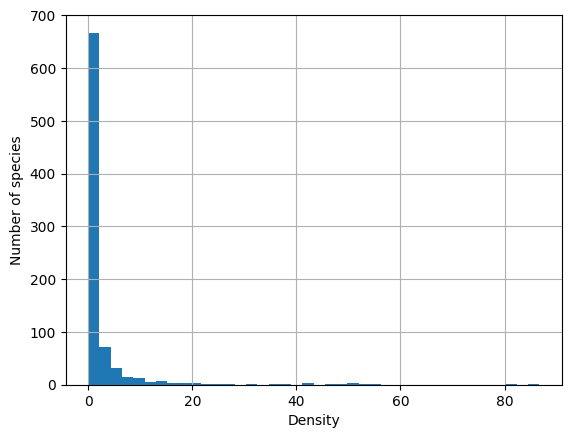

In [105]:
mammals_train['Density'].hist(bins = 40)
plt.xlabel('Density')
plt.ylabel('Number of species')
plt.show()

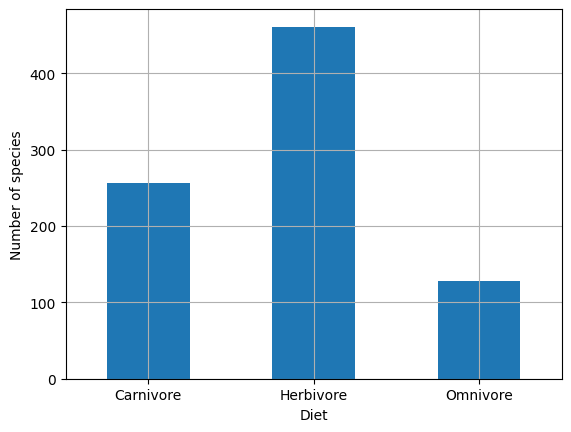

In [106]:
mammals_train['Diet'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel('Diet')
plt.ylabel('Number of species')
plt.show()

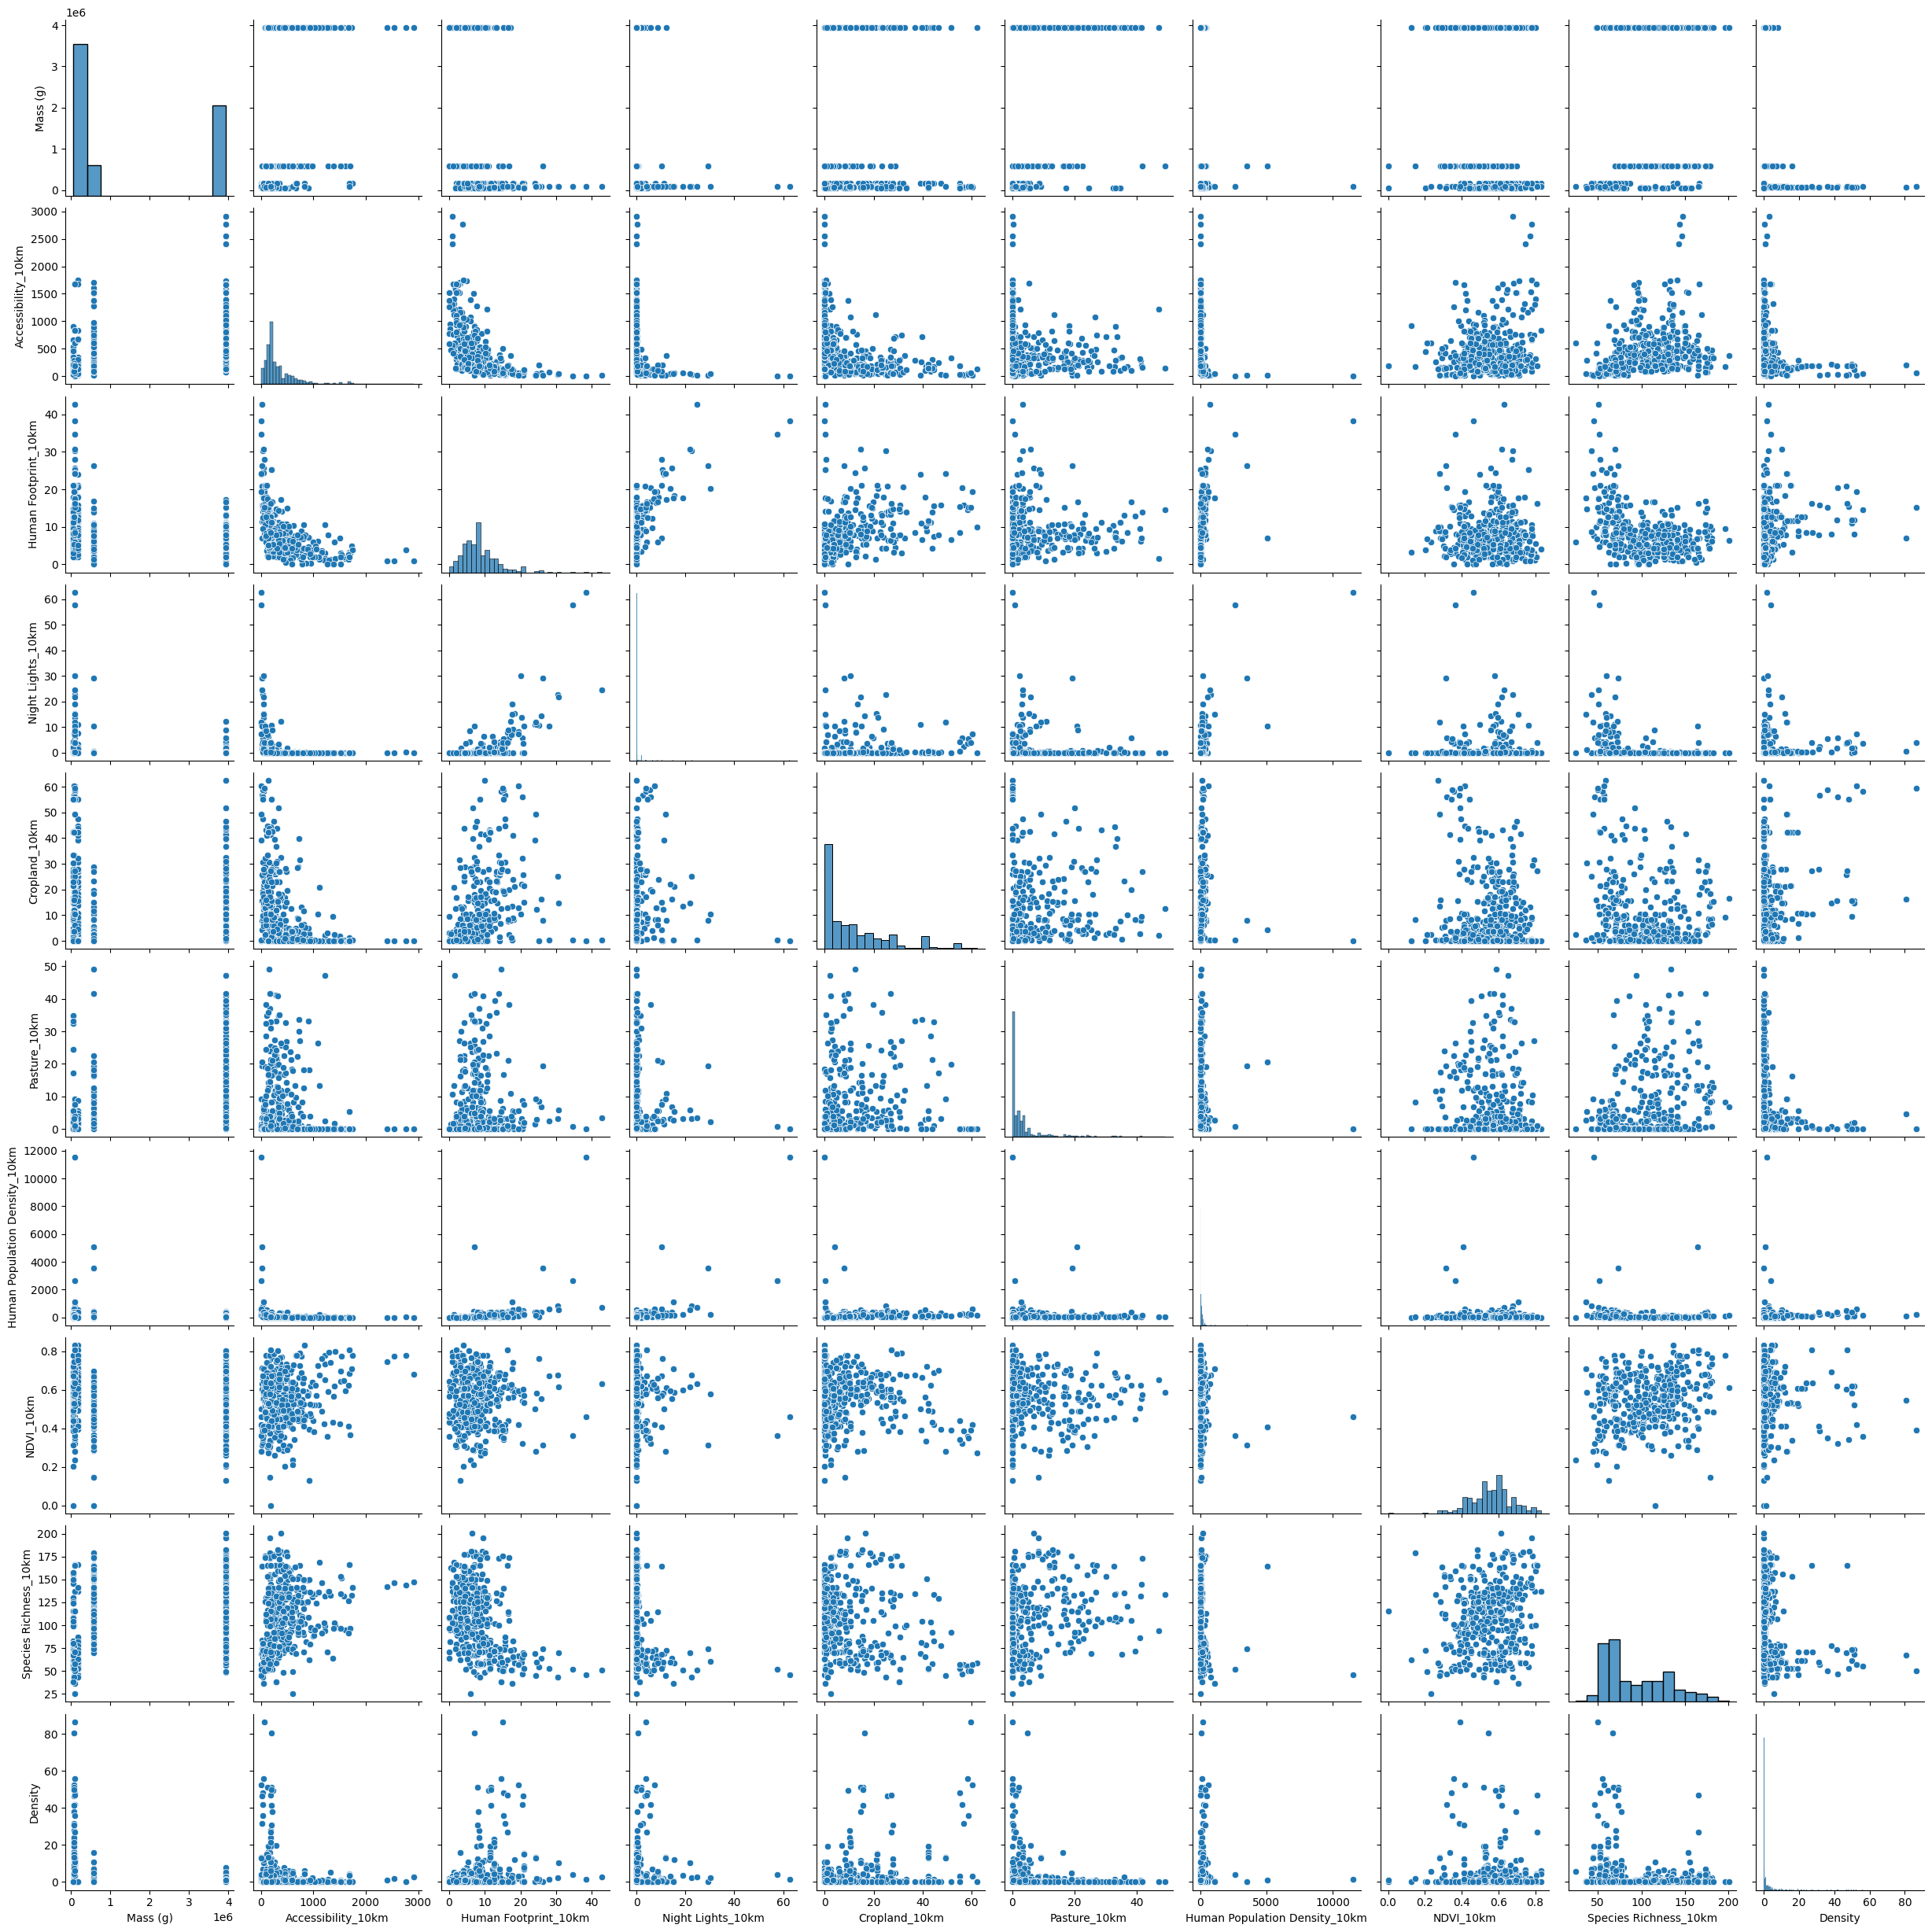

In [107]:
sns.pairplot(mammals_train)

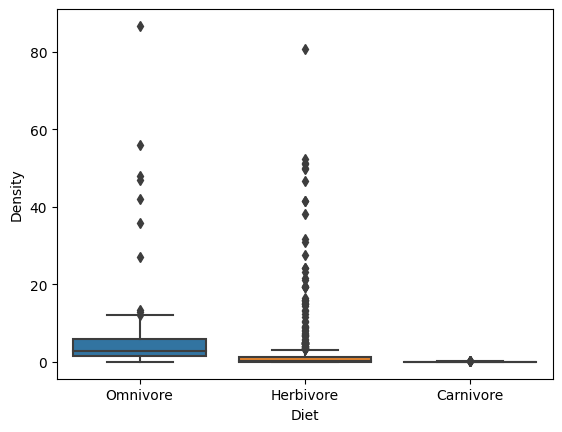

In [108]:
ax= sns.boxplot(x='Diet',y='Density',data=mammals_train)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Sus scrofa'),
  Text(1, 0, 'Syncerus caffer'),
  Text(2, 0, 'Loxodonta africana'),
  Text(3, 0, 'Panthera pardus'),
  Text(4, 0, 'Axis axis'),
  Text(5, 0, 'Panthera tigris')])

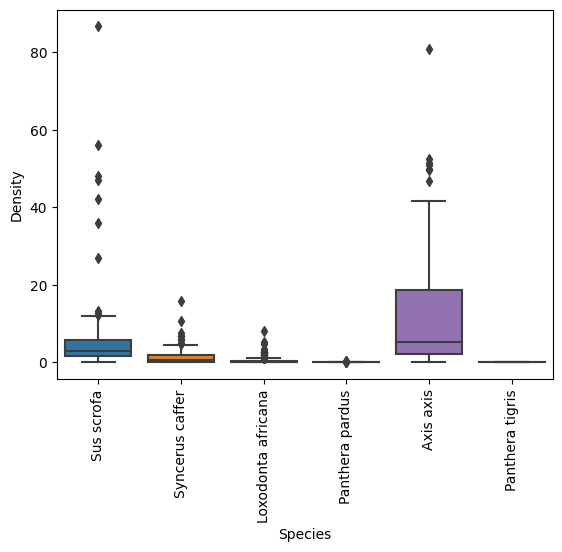

In [109]:
ax= sns.boxplot(x='Species',y='Density',data=mammals_train)
plt.xticks(rotation='vertical')

<Axes: xlabel='NDVI_10km', ylabel='Density'>

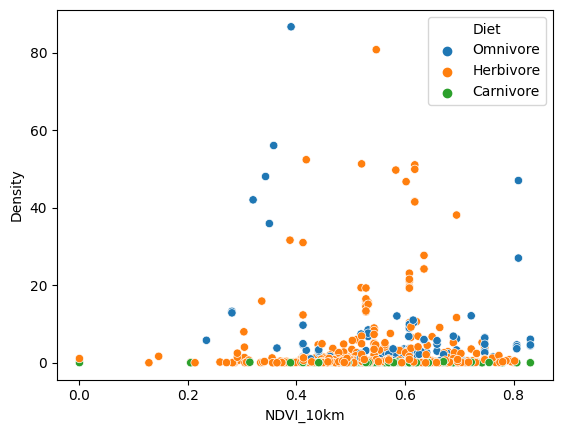

In [110]:
sns.scatterplot(mammals_train, x = 'NDVI_10km',y = 'Density', hue = 'Diet')

<Axes: xlabel='NDVI_10km', ylabel='Density'>

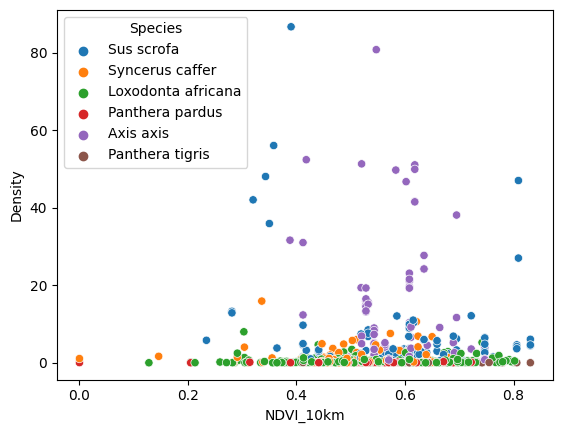

In [111]:
sns.scatterplot(mammals_train, x = 'NDVI_10km',y = 'Density', hue = 'Species')

## Data preprocessing

num_pipeline is for numerical features; it imputes null values with the median and then applies StandardScaler. cat_pipeline is for categorical features; it imputes null values with the most frequent value and applies one-hot encoding.

In [11]:
from sklearn.compose import make_column_selector, make_column_transformer 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown = 'ignore'))

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include = object)) 
)

We are trying to predict Density using the other features.

In [40]:
X_train = mammals_train.drop('Density',axis=1)
y_train = mammals_train['Density']

In [41]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, 
                                                              test_size = 0.2, 
                                                              random_state = 919,
                                                              stratify=X_train['Species'])

## Baseline model: expected value of Density

We use the expected value of the density as our baseline prediction.

In [42]:
baseline = y_train_train.mean()

In [43]:
from sklearn.metrics import mean_squared_error

baseline_rmse = np.sqrt(mean_squared_error(y_val, baseline*np.ones(len(y_val))))

In [44]:
print('the baseline rmse is', baseline_rmse)

the baseline rmse is 6.736042720749738


## K Nearest Neighbors Regressor

We check the rmse of a knn model with the default hyperparameters.

In [45]:
from sklearn.neighbors import KNeighborsRegressor

X_train_train = preprocessing.fit_transform(X_train_train)
X_val = preprocessing.transform(X_val)

reg = KNeighborsRegressor()
model = reg.fit(X_train_train,y_train_train)
pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print('rmse is', rmse)

rmse is 4.54972967483595


## Random forest regressor

We check the rmse of a random forest model with default hyperparameters.

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg = RandomForestRegressor()
model = reg.fit(X_train_train, y_train_train)
pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print(rmse)

6.104779586918284


## XGBoost regressor

We check the rmse of an XGBoost model with default hyperparameters.

In [47]:
from xgboost import XGBRegressor

# XGBoost model with default hyperparameters

reg = XGBRegressor(objective='reg:squarederror')
model = reg.fit(X_train_train, y_train_train) 
pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print('rmse is', rmse)

rmse is 7.1722782139765995


##Hyperparameter tuning for random forest regressor with GridSearchCV

We perform hyperparameter tuning for the random forest model using GridSearchCV.

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

full_pipeline = Pipeline([('preprocessing', preprocessing),
                          ('random_forest', RandomForestRegressor())])

param_grid = {'random_forest__n_estimators': [100,500,1000],
              'random_forest__max_features': ['sqrt','log2',None],
              'random_forest__max_depth': [2,5,None]} 

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=919)

grid_cv = GridSearchCV(full_pipeline, 
                       param_grid = param_grid,
                       cv = stratified_cv.split(X_train,X_train['Species']),
                       scoring = 'neg_root_mean_squared_error')

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f8aea13c740>,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8aa9bf6200>),
                                                                        ('pipeli...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8aa9a147c0>)])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__max_depth': [2, 5, None],
                         'random_forest__max_features': ['sqrt', 'log2', None],
                         'random_forest__n_estimators': [100, 500, 1000]},
             scoring='neg_root_mean_squared_error')

The results for GridSearchCV are displayed in the table below, sorted in order of rmse. The best model had a mean CV rmse of 4.83.

In [51]:
cv_res = pd.DataFrame(grid_cv.cv_results_)
cv_res.sort_values(by = 'mean_test_score', ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,2.166986,0.282215,0.055331,0.000549,None,sqrt,500,"{'random_forest__max_depth': None, 'random_for...",-3.285826,-5.407434,-4.311172,-2.849131,-8.282473,-4.827207,1.940642,1
21,0.401820,0.004398,0.016602,0.000140,None,log2,100,"{'random_forest__max_depth': None, 'random_for...",-3.113737,-5.388800,-4.571397,-2.769091,-8.294790,-4.827563,1.978726,2
23,4.118780,0.273069,0.118105,0.025263,None,log2,1000,"{'random_forest__max_depth': None, 'random_for...",-3.305049,-5.475455,-4.304896,-2.825135,-8.284770,-4.839061,1.947939,3
22,2.064327,0.179143,0.059852,0.010762,None,log2,500,"{'random_forest__max_depth': None, 'random_for...",-3.348957,-5.516129,-4.343170,-2.852123,-8.303602,-4.872796,1.942679,4
20,4.451815,0.532086,0.122682,0.035811,None,sqrt,1000,"{'random_forest__max_depth': None, 'random_for...",-3.337099,-5.499863,-4.445437,-2.854463,-8.300671,-4.887507,1.936860,5


##Hyperparameter tuning for XGBoost

In [28]:
full_pipeline = Pipeline([('preprocessing', preprocessing),
                          ('xgb', XGBRegressor())])

param_grid = {'xgb__max_depth': [1,2,3,6,10],
              'xgb__learning_rate': [0.1,0.3,0.5],
              'xgb__n_estimators': [100,200,500],
              'xgb__colsample_bytree': [0.7,1]} 

grid_cv = GridSearchCV(full_pipeline, 
                       param_grid = param_grid,
                       cv = 5,
                       scoring = 'neg_root_mean_squared_error')

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8aa9bf6200>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImp...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__colsample_bytree': [0.7, 1],
                         'xgb__learning_rate': [0.1, 0.3, 0.5],
                         'xgb__max_depth': [1, 2, 3, 6, 10],
                         'xgb__n_estimators': [100, 200, 500]},
             scoring='neg_root_mean_squared_error')

The results for GridSearchCV are below, sorted in order of rmse. The best model had a mean CV rmse of 5.49.

In [29]:
cv_res = pd.DataFrame(grid_cv.cv_results_)
cv_res.sort_values(by = 'mean_test_score', ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgb__colsample_bytree,param_xgb__learning_rate,param_xgb__max_depth,param_xgb__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
41,0.541885,0.014095,0.007635,0.000635,0.7,0.5,6,500,"{'xgb__colsample_bytree': 0.7, 'xgb__learning_...",-3.955287,-4.701097,-4.941060,-4.366937,-9.502556,-5.493387,2.031791,1
40,0.379800,0.013788,0.006982,0.000164,0.7,0.5,6,200,"{'xgb__colsample_bytree': 0.7, 'xgb__learning_...",-3.955287,-4.701097,-4.941060,-4.366937,-9.502556,-5.493387,2.031791,2
39,0.236845,0.006475,0.006651,0.000057,0.7,0.5,6,100,"{'xgb__colsample_bytree': 0.7, 'xgb__learning_...",-3.955187,-4.701068,-4.939736,-4.367506,-9.504064,-5.493512,2.032412,3
29,0.561473,0.012992,0.007302,0.000106,0.7,0.3,10,500,"{'xgb__colsample_bytree': 0.7, 'xgb__learning_...",-3.772773,-5.212353,-4.917946,-4.529866,-9.095442,-5.505676,1.858658,4
28,0.394642,0.012094,0.007019,0.000117,0.7,0.3,10,200,"{'xgb__colsample_bytree': 0.7, 'xgb__learning_...",-3.772773,-5.212353,-4.917946,-4.529866,-9.095442,-5.505676,1.858658,5


## Hyperparameter tuning for k-nearest neighbors

In [52]:
full_pipeline = Pipeline([('preprocessing', preprocessing),
                          ('knn', KNeighborsRegressor())])

param_grid = {'knn__n_neighbors': [2,5,10,20],
              'knn__weights': ['uniform','distance']} 

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=919)

grid_cv = GridSearchCV(full_pipeline, 
                       param_grid = param_grid,
                       cv = stratified_cv.split(X_train,X_train['Species']),
                       scoring = 'neg_root_mean_squared_error')

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f8aea19fbc0>,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8aa9bf6200>),
                                                                        ('pipeli...
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8aa9a147c0>)])),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [2, 5, 10, 20],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

The results for GridSearchCV are below, sorted in order of rmse. The best model had a mean CV rmse of 4.72.

In [53]:
cv_res = pd.DataFrame(grid_cv.cv_results_)
cv_res.sort_values(by = 'mean_test_score', ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.014022,0.000432,0.034691,0.005693,10,distance,"{'knn__n_neighbors': 10, 'knn__weights': 'dist...",-3.580727,-5.412026,-3.628683,-2.540796,-8.432824,-4.719011,2.073731,1
7,0.013865,0.000343,0.032515,0.003709,20,distance,"{'knn__n_neighbors': 20, 'knn__weights': 'dist...",-3.801703,-5.234888,-3.739122,-2.798340,-8.600870,-4.834985,2.037563,2
3,0.023243,0.003137,0.109124,0.075764,5,distance,"{'knn__n_neighbors': 5, 'knn__weights': 'dista...",-3.852282,-5.497448,-3.665459,-2.982055,-8.223097,-4.844068,1.880670,3
1,0.028426,0.004655,0.088317,0.052056,2,distance,"{'knn__n_neighbors': 2, 'knn__weights': 'dista...",-5.191558,-5.690050,-3.397375,-2.212491,-8.473919,-4.993079,2.140998,4
0,0.019755,0.003731,0.079492,0.056622,2,uniform,"{'knn__n_neighbors': 2, 'knn__weights': 'unifo...",-5.074610,-5.900373,-3.998771,-2.304519,-8.626196,-5.180894,2.100952,5


We fine-tune the hyperparameters more below.

In [58]:
full_pipeline = Pipeline([('preprocessing', preprocessing),
                          ('knn', KNeighborsRegressor())])

param_grid = {'knn__n_neighbors': np.arange(2,21,1),
              'knn__weights': ['distance']} 

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=919)

grid_cv = GridSearchCV(full_pipeline, 
                       param_grid = param_grid,
                       cv = stratified_cv.split(X_train,X_train['Species']),
                       scoring = 'neg_root_mean_squared_error')

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f8a94bff530>,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8aa9bf6200>),
                                                                        ('pipeli...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8aa9a147c0>)])),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'knn__weights': ['distance']},
             scoring='neg_root_mean_squared_error')

The results for the fine-tuning are below, sorted in order of rmse. The best model had a mean CV rmse of 4.68.

In [59]:
cv_res = pd.DataFrame(grid_cv.cv_results_)
cv_res.sort_values(by = 'mean_test_score', ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.013798,0.000345,0.032438,0.002421,8,distance,"{'knn__n_neighbors': 8, 'knn__weights': 'dista...",-3.493720,-5.457855,-3.612308,-2.471749,-8.369210,-4.680969,2.080333,1
5,0.014152,0.000178,0.032497,0.003567,7,distance,"{'knn__n_neighbors': 7, 'knn__weights': 'dista...",-3.554439,-5.393571,-3.652510,-2.512716,-8.361710,-4.694989,2.053426,2
9,0.014731,0.001689,0.033368,0.002782,11,distance,"{'knn__n_neighbors': 11, 'knn__weights': 'dist...",-3.654802,-5.188012,-3.620351,-2.530210,-8.507622,-4.700200,2.083373,3
7,0.013849,0.000439,0.036055,0.011587,9,distance,"{'knn__n_neighbors': 9, 'knn__weights': 'dista...",-3.571919,-5.444645,-3.600001,-2.555459,-8.364664,-4.707338,2.052589,4
8,0.014098,0.000334,0.030630,0.000391,10,distance,"{'knn__n_neighbors': 10, 'knn__weights': 'dist...",-3.580727,-5.412026,-3.628683,-2.540796,-8.432824,-4.719011,2.073731,5


The plot for rmse for different values of n (the number of neighbors used to estimate density) is below. The best value was n = 8.

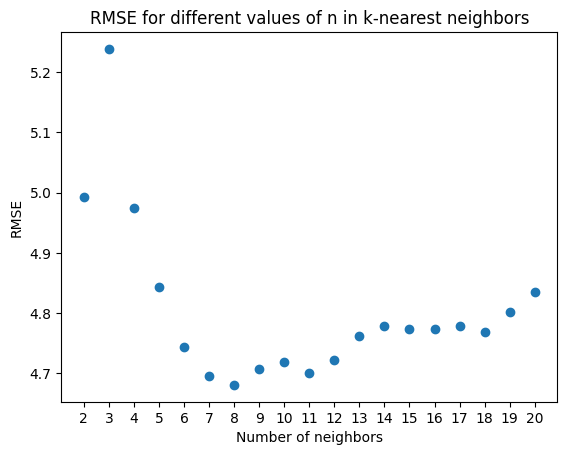

In [69]:
plt.scatter(cv_res['param_knn__n_neighbors'], -1*cv_res['mean_test_score'])
plt.xticks(ticks=np.arange(2,21))
plt.xlabel('Number of neighbors')
plt.ylabel('RMSE')
plt.title('RMSE for different values of n in k-nearest neighbors')
plt.savefig('rmse_knn.jpg')
plt.show()

##Evaluating the best models on the test set

The rmse for the baseline model on the test set is 7.23.

In [72]:
baseline = y_train.mean()
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline*np.ones(len(y_test))))
print('the baseline rmse is', baseline_rmse)

the baseline rmse is 7.225739323709867


The rmse for knn on the test set is 6.00.

In [70]:
X_train = preprocessing.fit_transform(X_train)

X_test = mammals_test.drop('Density',axis=1)
y_test = mammals_test['Density']

X_test = preprocessing.transform(X_test)

reg = KNeighborsRegressor(n_neighbors=8, weights='distance')
model = reg.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('rmse for k-nearest neighbors on the test set is ', rmse)
                                 

rmse for k-nearest neighbors on the test set is  6.004155244667679


The rmse for XGBoost on the test set is 6.22.

In [74]:
reg = XGBRegressor(max_depth=6,
                   learning_rate=0.5,
                   n_estimators=500,
                   colsample_bytree=0.7)
model = reg.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('rmse for XGBoost regressor is ', rmse)

rmse for XGBoost regressor is  6.220378995121913


The rmse for the random forest model on the test set is 5.30.

In [75]:
reg = RandomForestRegressor(max_depth = None, n_estimators=500, max_features = 'sqrt')
model = reg.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('rmse for random forest regressor is ', rmse)

rmse for random forest regressor is  5.302845405923123


The model that performed the best on the test set was the random forest model, with an rmse of 5.30.

##Feature importance

The random forest model assigns a feature importance score to each feature. The list below ranks the features in order of importance. The top five features that contribute to species density are Cropland, Night Lights, Human Population Density, NDVI, and Human Footprint.

In [79]:
sorted(zip(model.feature_importances_, preprocessing.get_feature_names_out()), reverse=True)
           

[(0.14482351463134668, 'pipeline-1__Cropland_10km'),
 (0.09909643112695218, 'pipeline-1__Night Lights_10km'),
 (0.08978485832383316, 'pipeline-1__Human Population Density_10km'),
 (0.08406374427674777, 'pipeline-1__NDVI_10km'),
 (0.07778164219160087, 'pipeline-1__Human Footprint_10km'),
 (0.07151203000328803, 'pipeline-1__Species Richness_10km'),
 (0.07055746088404369, 'pipeline-1__Accessibility_10km'),
 (0.06414396784646624, 'pipeline-1__Pasture_10km'),
 (0.05896125763276225, 'pipeline-2__Family_Cervidae'),
 (0.05227160688452292, 'pipeline-2__Species_Axis axis'),
 (0.03269385324727031, 'pipeline-1__Mass (g)'),
 (0.027109881068767726, 'pipeline-2__Order_Cetartiodactyla'),
 (0.022046509073813753, 'pipeline-2__Country_India'),
 (0.012248329993182068, 'pipeline-2__Diet_Herbivore'),
 (0.010008088125212857, 'pipeline-2__Order_Carnivora'),
 (0.009521444458685663, 'pipeline-2__Species_Sus scrofa'),
 (0.00951703906337526, 'pipeline-2__Country_Malaysia'),
 (0.008830138516658686, 'pipeline-2__Fa